In [3]:
import os
import sqlite3
import pandas as pd

# 1. Define the relative path to your database
# '../' means move up one directory to the root, then into 'data'
database_path = "../data/qlx_network.db"

# 2. Check if the file exists
if os.path.exists(database_path):
    print(f"SUCCESS: Database found at {os.path.abspath(database_path)}")
    
    # 3. Create a connection
    try:
        connection = sqlite3.connect(database_path)
        
        # 4. List all tables to see what we have
        query = "SELECT name FROM sqlite_master WHERE type='table';"
        tables = pd.read_sql_query(query, connection)
        
        print("\nTables in your database:")
        print(tables)
        
        connection.close()
    except Exception as e:
        print(f"ERROR: Could not read the database. {e}")
else:
    print(f"FAILED: Database not found. Current Working Directory: {os.getcwd()}")

SUCCESS: Database found at /Users/scott/QLX-Production/data/qlx_network.db

Tables in your database:
    name
0  nodes


In [2]:
%pip install pandas matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import sqlite3
import pandas as pd

# 1. Connect and Read
database_path = "../data/qlx_network.db"
connection = sqlite3.connect(database_path)

# 2. Load the 'history' table into a DataFrame
df = pd.read_sql_query("SELECT * FROM history", connection)

# 3. Close connection
connection.close()

# 4. Display the first 5 rows and the data types
print("--- Data Overview ---")
print(df.head())
print("\n--- Column Info ---")
print(df.info())

--- Data Overview ---
                                   uuid    pwr     valor     last_seen
0  cb3dbbe2-9c78-44bd-8c80-7d6e1db7a5cf  67.67  0.026664  1.767248e+09

--- Column Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   uuid       1 non-null      object 
 1   pwr        1 non-null      float64
 2   valor      1 non-null      float64
 3   last_seen  1 non-null      float64
dtypes: float64(3), object(1)
memory usage: 160.0+ bytes
None


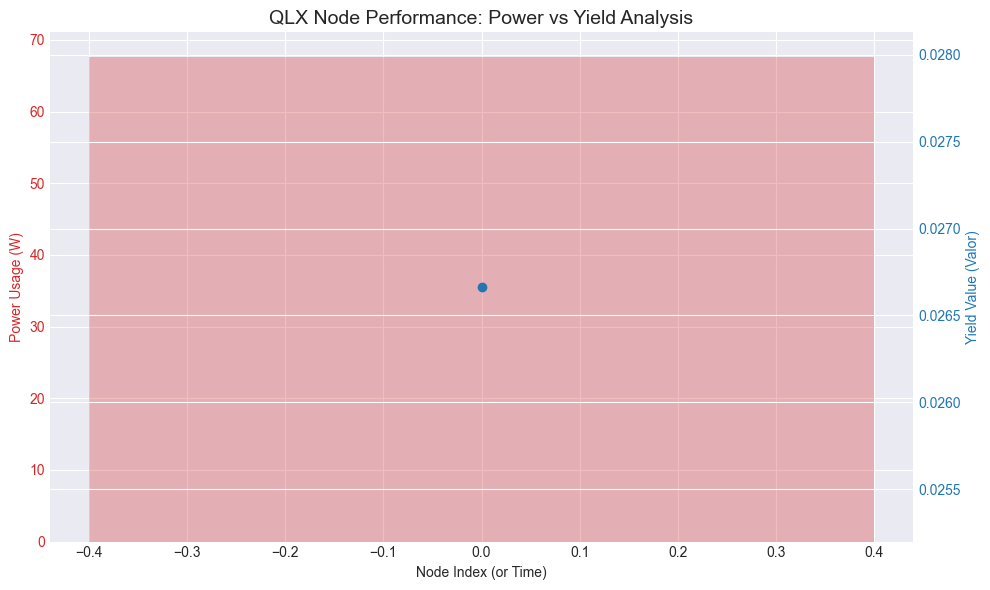

✅ Success! The chart has been saved to: ../assets/screenshots/performance_analysis_v1.png


In [9]:
import matplotlib.pyplot as plt

# 1. Feature Engineering: Calculate Efficiency (Value per Watt)
# This is a key metric for "Energy-to-Compute Normalization"
df['efficiency'] = df['valor'] / df['pwr']

# 2. Setup the visualization style
plt.style.use('seaborn-v0_8-darkgrid') # Professional scientific style
fig, ax1 = plt.subplots(figsize=(10, 6))

# 3. Plotting Value and Power
color_pwr = 'tab:red'
ax1.set_xlabel('Node Index (or Time)')
ax1.set_ylabel('Power Usage (W)', color=color_pwr)
ax1.bar(df.index, df['pwr'], color=color_pwr, alpha=0.3, label='Power (W)')
ax1.tick_params(axis='y', labelcolor=color_pwr)

# 4. Create a second y-axis for Value
ax2 = ax1.twinx()
color_val = 'tab:blue'
ax2.set_ylabel('Yield Value (Valor)', color=color_val)
ax2.plot(df.index, df['valor'], color=color_val, marker='o', linewidth=2, label='Yield (Valor)')
ax2.tick_params(axis='y', labelcolor=color_val)

# 5. Add Title and Layout
plt.title('QLX Node Performance: Power vs Yield Analysis', fontsize=14)
fig.tight_layout()

# 6. Save the chart to your 'assets' folder for your GitHub README
# Ensure the path is correct relative to 'research/' folder
output_path = "../assets/screenshots/performance_analysis_v1.png"
plt.savefig(output_path, dpi=300)

plt.show()

print(f"✅ Success! The chart has been saved to: {output_path}")